# Header

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spinmob as s
from scipy import interpolate as interpolate
from scipy import integrate as integrate
import os
import camb
import time
#%matplotlib notebook

In [2]:
# check directory
os.chdir("D:\Raphael\Dropbox\Mcgill\JupyterNotebook\PHYS512")
os.getcwd()

'D:\\Raphael\\Dropbox\\Mcgill\\JupyterNotebook\\PHYS512'

## Fonctions

In [3]:
# Gaussian fonction
def Gaus(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

In [4]:
# Box fonction
def Box(x,a=1,b=0,c=1):
    box = np.zeros(len(x))
    for i in range(len(x)):
        if x[i]<=(b-c/2):
            box[i] = 0
        elif x[i]>=(b+c/2):
            box[i] = 0
        else:
            box[i] = a
    return box

# Question 1
Write a function that will shift an array by an arbitrary amount using a convolution (yes, I know there are easier ways to do this). The function should take 2 arguments - an array, and an amount by which to shift the array. Plot a gaussian that started in the centre of the array shifted by half the array length.

In [159]:
# Shifting fonction
def shift(A,dx):
    
    # Define a shifter; a "box function" array offset from 0 by dx:
    if dx>=0:
        shifter = np.append(np.zeros(dx),np.array(1))
        # Convolute the shifter with A[1]:
        shifted = np.convolve(shifter,A[1],mode="full")[:-dx]
        # Note: the [:-dx] assures that "shifted" has the same lenght that "A[0]"
    if dx<0:
        shifter = np.append(np.array([1]),np.zeros(-dx))
        # Convolute the shifter with A[1]:
        shifted = np.convolve(shifter,A[1],mode="full")[-dx:]
        # Note: the [-dx:] assures that "shifted" has the same lenght that "A[0]"
    
    # Return the shifted A[1]:
    return np.array([A[0],shifted])

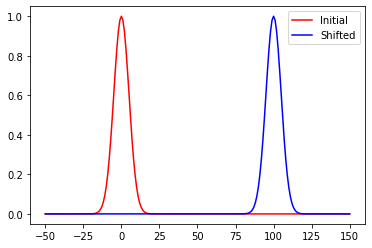

In [160]:
# Create the array for the Gausian test
size = 201
t0 = -50
tf = 150
x = np.linspace(t0,tf, size)
g1 = Gaus(x,1,0,5)
array_g1 = np.array([x,g1])

# Shift the gaussian by half the using the Shift() fonction
array_g2 = shift(array_g1, int(len(array_g1[0])/2))
plt.plot(array_g1[0],array_g1[1],"r", label = "Initial")
plt.plot(array_g2[0],array_g2[1],"b", label = "Shifted")
plt.legend()

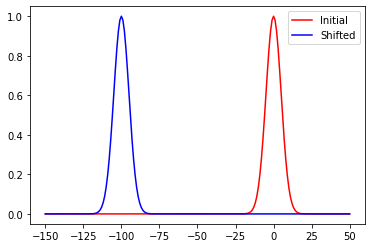

In [161]:
#Lets check that the function also works with neg. shift:
size = 201
t0 = -150
tf = 50
x = np.linspace(t0,tf, size)
g1 = Gaus(x,1,0,5)
array_g1 = np.array([x,g1])

# Shift the gaussian by half the using the Shift() fonction
array_g2 = shift(array_g1, -int(len(array_g1[0])/2))
plt.plot(array_g1[0],array_g1[1],"r", label = "Initial")
plt.plot(array_g2[0],array_g2[1],"b", label = "Shifted")
plt.legend()

# Question 2
The correlation function $f\star g$ is $\int f(x)g(x+y)dx$. Through a similar proof, one can show $f\star g = if t(df t(f) ∗ conj(df t(g)))$. Write a routine to take the correlation function of two arrays. Plot the correlation function of a Gaussian with itself.

# Question 3
Using the results of part 1 and part 2, write a routine to take the correlation function of a Gaussian (shifted by an arbitrary amount) with itself. How does the correlation function depend on the shift? Does this surprise you?

# Question 4
The circulant (wrap-around) nature of the dft can sometimes be problematic. Write a routine to take the convolution of two arrays without any danger of wrapping around. You may wish to add zeros to the end of the input arrays.

# Question 5
DFTs work very nicely out of the box when there are an integer number of periods of a wave in the region analyzed. Sadly, when we are dealing with real data, we usually are forced to analyze a finite chunk of data, and there will in general be no particular relation between the frequencies in the data and the interval we’re analyzing. We’ll look at the effects of this a bit now.

(...)